In [32]:
import math
import warnings
from datetime import datetime
start=datetime.now()
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn import tree,model_selection
from sklearn.grid_search import GridSearchCV
# A convenience for displaying visualizations.
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import time
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import gzip
import numpy as np
import json
# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
start=datetime.now()
rfc = ensemble.RandomForestClassifier()
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

#df = getDF('C:/Users/ankush/Downloads/reviews_Pet_Supplies_5.json.gz')
df=data = pd.read_json('C:/Personal/09142640/Downloads/Pet_Supplies_5.json',lines=True)


In [2]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1223000893,"[0, 0]",3,I purchased the Trilogy with hoping my two cat...,"01 12, 2011",A14CK12J7C7JRK,Consumer in NorCal,Nice Distraction for my cats for about 15 minutes,1294790400
1,1223000893,"[0, 0]",5,There are usually one or more of my cats watch...,"09 14, 2013",A39QHP5WLON5HV,Melodee Placial,Entertaining for my cats,1379116800
2,1223000893,"[0, 0]",4,I bought the triliogy and have tested out all ...,"12 19, 2012",A2CR37UY3VR7BN,Michelle Ashbery,Entertaining,1355875200
3,1223000893,"[2, 2]",4,My female kitty could care less about these vi...,"05 12, 2011",A2A4COGL9VW2HY,Michelle P,Happy to have them,1305158400
4,1223000893,"[6, 7]",3,"If I had gotten just volume two, I would have ...","03 5, 2012",A2UBQA85NIGLHA,"Tim Isenhour ""Timbo""",You really only need vol 2,1330905600


In [12]:
df['overall'].describe()

count   55550.000
mean        4.244
std         1.182
min         1.000
25%         4.000
50%         5.000
75%         5.000
max         5.000
Name: overall, dtype: float64

In [34]:
import string
from nltk.corpus import stopwords
##Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”
from nltk.stem.porter import PorterStemmer
#cleanup_re = re.compile('[^a-z]+')
def cleanText(text):
    stop_words = set(stopwords.words('english'))
    table = str.maketrans('', '', string.punctuation)
    porter = PorterStemmer()
    #text=cleanup_re.sub(' ',text)
    text = text.lower()
    
    words = text.split()
    words = [w.translate(table) for w in words]
    words = [porter.stem(w) for w in words if not w in stop_words]
    return ' '.join(words)

df['reviewText'] = df['reviewText'].apply(cleanText)
df['reviewText'].head(10)

0    purcha trilog hope two cat age 3 5 would inter...
1    usual one cat watch tv stay troubl dvd play se...
2    bought triliogi test dvd appear volum 2 well r...
3    femal kitti could care less videosbut care les...
4    gotten volum two would given five star sinc go...
5    rotti food allergi poultri beef dairi ive diff...
6    puppi love stuff tail start wag soon ask readi...
7    toy poodl love stuff let 34sort34 brush teeth ...
8    work great dog doesnt hate tast gum health imp...
9    ye princess enjoy tast show get besttop result...
Name: reviewText, dtype: object

In [25]:
from collections import Counter 
split_it = df['reviewText'].str.split().to_dict()
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
for word, count in Counter.most_common(10):
    print(word, ": ", count)

21924 :  ['zzi', 'realli', 'play', 'much', 'thought', 'would', 'think', 'neat', 'make', 'fun', 'nois', 'bounc', 'floor', 'seem', 'interest', 'though', 'even', 'put', 'kibbl', 'insid', 'teeth', 'month', 'old', 'would', 'think', 'like', 'chew', 'rubber', 'ut', 'far', 'prefer', 'item', 'e', 'keep', 'work', 'though']
12644 :  ['zzi', 'love', 'jolli', 'ball', 'blast', 'kick', 'throw', 'around', 'yard', 'run', 'around', 'handl', 'mouth', 'ball', 'strictli', 'outdoor', 'last', 'one', 'season', 'new', 'rlean', 'heat', 'rain', 'upload', 'pictur', 'play', 'super', 'fun', 'outdoor', 'toy', 'reason', 'gave', 'four', 'star', 'handl', 'give', 'dog', 'chew', 'drag', 'reinforc', 'handl', 'would', 'extend', 'longev', 'ball']
17631 :  ['zoo', 'med', 'exoterra', 'wire', 'clamp', 'lamp', 'small', 'size', 'eram', 'eat', 'mitter', 'hook', 'thermostat', 'regul', 'temperatur', 'arriv', 'new', 'undamag', 'got', 'zoom', 'one', 'time', 'around', 'slightli', 'less', 'expens', 'exoterra', 'purchas', 'differ', 'ter

In [6]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df.reviewText)
X_counts.shape

(55550, 27261)

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
X_tfidf.shape

(55550, 27261)

In [8]:
df['review_state']=[1 if x > 3 else 0 for x in df.overall]

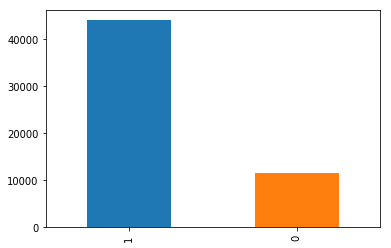

In [23]:
df['review_state'].value_counts().plot.bar()

In [9]:

Y = [1 if x > 3 else 0 for x in df.overall]

In [10]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
# Instantiate our model and store it in a new variable.
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_sampled,y_sampled = sm.fit_sample(X_tfidf,Y)
X_train_sample,X_test_sample,y_train_sample,y_test_sample = train_test_split(X_sampled,y_sampled,test_size=.20)

In [13]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
X_svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
X_svd.fit(X_train_sample)  
X_train_svd = X_svd.transform(X_train_sample)
X_test_svd = X_svd.transform(X_test_sample)

In [14]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB() 
bnb = bnb.fit(X_train_svd, y_train_sample)
y_pred_bnb = bnb.predict(X_train_svd)
print("Accuracy:", bnb.score(X_train_svd, y_train_sample))

Accuracy: 0.6890617666718815


In [15]:

#Random Forest
rfc = ensemble.RandomForestClassifier(max_depth=10,n_estimators= 100)
rfc.fit(X_train_svd, y_train_sample)
y_pred_rfc = rfc.predict(X_train_svd)
#Gridsearchcv to get the best parameters
dt_grid={'max_depth':[3,4,5],'max_features': [50]}

grid_class_rfc=model_selection.GridSearchCV(rfc,dt_grid,cv=6)
grid_class_rfc.fit(X_train_svd, y_train_sample)
results = grid_class_rfc.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_rfc.best_params_)
print(grid_class_rfc.best_score_)
final_model = grid_class_rfc.best_estimator_
print(final_model)

In [16]:
print("Testing data accuracy for RandomForest: ",cross_val_score(rfc, X_test_svd, y_test_sample, cv=10))


Testing data accuracy for RandomForest:  [0.80272882 0.77828312 0.79079022 0.79806598 0.78498294 0.81171786
 0.79396699 0.78941377 0.79567445 0.80250427]


logistic Regression

In [17]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver='lbfgs' , C=1000)
logistic = logreg.fit(X_train_svd, y_train_sample)
y_pred_lr = logreg.predict(X_train_svd)